Word2Vec is a model that embeds words in a lower-dimensional vector space using a shallow neural network. The result is a set of word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings. For example, strong and powerful would be close together and strong and Paris would be relatively far.

With the Word2Vec model, we can calculate the vectors for each word in a document. But what if we want to calculate a vector for the entire document? We could average the vectors for each word in the document - while this is quick and crude, it can often be useful. However, there is a better way…

### Doc2vec or Paragraph Vector

Doc2Vec is a Model that represents each Document as a Vector.


There are 2 types of Doc2Vec:
- Paragraph Vector - Distributed Memory (PV-DM)
- Paragraph Vector - Distributed Bag of Words (PV-DBOW)


PV-DM is analogous to Word2Vec CBOW. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a center word based an average of both context word-vectors and the full document’s doc-vector.

### 1. Paragraph Vector - Distributed Memory (PV-DM )
- Analogy to Word2Vec CBOW
- Predicts a target word using the average of context words vector + full document’s doc-vector.
- Learns both word vectors and document vectors.

**Info:**

Document vector acts like a memory that remembers what is missing from the context.

**Implementation Info**

The authors have used the word2vec model, and added another vector (Paragraph ID below) which represents doc vector. Instead of using just context words to predict the center word, they also added another feature vector, which is document-unique.

So, when training the word vectors W, the document vector D is trained as well, and in the end of training, it holds a numeric representation of the document.

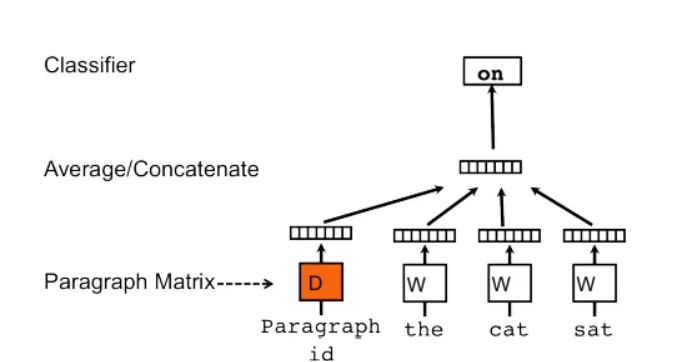

Eg:

Given sentence:
["the", "movie", "was", "fantastic"]

Suppose window = 2, and current target word is "was"
→ Context = ["the", "movie", "fantastic"]
→ Input = context + document ID
→ Model tries to predict "was" by taking the embeddings of context vectors and document vector. Each doc is uniquely represented by its id. (TaggedDocument)

### 2. Paragraph Vector - Distributed Bag of Words (PV-DBOW)
- Analogous to Word2Vec Skip-Gram
- Ignores word ordering.
- Learns to predict words in a document just from the full document’s the document vector (not the context words).

**Note:** Word vectors not learned unless dbow_words=1 is set.

**Info:**

- This algorithm is actually faster (as opposed to word2vec) and consumes less memory, since there is no need to save the word vectors.
- Good when combined with PV-DM vectors.

Eg:

Given document ID:

Doc_47 → ["the", "movie", "was", "fantastic"]

→ Model randomly picks a word like "fantastic"

→ Uses only the document vector to predict "fantastic"

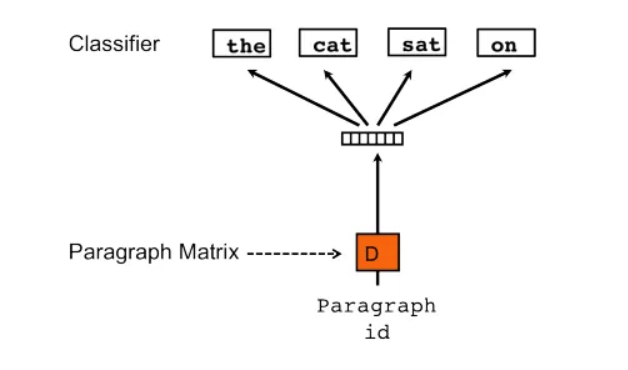

The doc2vec models may be used in the following way: for training, a set of documents is required. A word vector W is generated for each word, and a document vector D is generated for each document. The model also trains weights for a softmax hidden layer. In the inference stage, a new document may be presented, and all weights are fixed to calculate the document vector.

**Combining DM + DBOW**

We can train both models and concatenate their vectors for better performance.
This is often the recommended approach in practice.

In [15]:
try:
    import gensim
except:
    !pip install gensim

### Doc2Vec on LeeCorpus Dataset

In [16]:
import os
import gensim
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

In [17]:
gensim.__path__, gensim.__path__[0]

(['/usr/local/lib/python3.11/dist-packages/gensim'],
 '/usr/local/lib/python3.11/dist-packages/gensim')

In [18]:
gensim_data_path = os.path.join(gensim.__path__[0], "test", "test_data")
gensim_data_path

'/usr/local/lib/python3.11/dist-packages/gensim/test/test_data'

In [19]:
# Get the Train and Test data
train_file_lee = os.path.join(gensim_data_path, "lee_background.cor")
test_file_lee = os.path.join(gensim_data_path, "lee.cor")

In [20]:
train_file_lee, test_file_lee

('/usr/local/lib/python3.11/dist-packages/gensim/test/test_data/lee_background.cor',
 '/usr/local/lib/python3.11/dist-packages/gensim/test/test_data/lee.cor')

In [21]:
# Example
import smart_open
import spacy

def read_c(file_path, tokens_only=False):
    nlp = spacy.load("en_core_web_sm")
    with smart_open.open(file_path, "r", encoding="iso-8859-1") as f_docs:  # latin encoding with smart open
        for idx, doc in enumerate(f_docs):
            doc = doc.lower()
            tokens = nlp(doc)
            for tok in tokens:
                print(tok.lemma_)
                break
train_c = read_c(train_file_lee)

hundred
indian
the
argentina
six
the
the
hundred
there
some
work
peru
president
talk
the
only
south
spain
new
the
argentine
the
the
americans
a
the
pakistan
swedish
a
the
the
there
an
new
pakistan
a
new
australia
a
a
firefighter
the
virgin
after
a
sir
seven
australia
thousand
european
afghan
russian
skipper
a
police
melbourne
an
afghanistan
pakistan
australian
israel
a
japanese
tight
a
the
argentina
a
after
an
the
in
australian
the
the
us
the
the
the
dozen
zimbabwe
a
the
the
it
hamas
argentina
the
the
after
anti
the
federal
a
foreign
legal
england
australian
the
the
the
ansett
the
the
australian
fresh
the
the
the
fire
the
joseph
australian
the
the
australia
yasser
union
australia
australia
union
the
at
a
the
the
federal
us
qanta
the
the
the
australia
the
israel
a
a
striking
the
australia
osama
united
the
kashmiri
an
israeli
the
the
the
the
industrial
senior
the
at
australia
the
industrial
a
the
the
a
australian
the
the
japanese
socceroo
the
turn
six
a
the
drug
the
united
milestone
abou

In [22]:
# Read the file with lating encoding
import smart_open  # when dealing with big files, helps as generator(doesnt load whole file into memory)
import spacy
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

def read_corpus(file_path, tokens_only=False):
    with smart_open.open(file_path, "r", encoding="iso-8859-1") as f_docs:
        nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
        stop_words = stopwords.words("english")
        for idx, doc in enumerate(f_docs):
            doc = doc.lower()
            tokens = nlp(doc)
            clean_doc = " ".join([tok.lemma_ for tok in tokens if tok.is_alpha and tok.lemma_ not in stop_words])
            tokens = gensim.utils.simple_preprocess(clean_doc)
            if tokens_only:
                # for testing
                yield tokens
            else:
                # For training data, add idx as tags to the document
                yield TaggedDocument(words=tokens, tags=[idx])

train_corpus = list(read_corpus(train_file_lee))
test_corpus = list(read_corpus(test_file_lee, tokens_only=True))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
len(train_corpus), type(train_corpus[0]), train_corpus[0], len(train_corpus[0].words), train_corpus[0].tags

(300,
 gensim.models.doc2vec.TaggedDocument,
 TaggedDocument(words=['hundred', 'people', 'force', 'vacate', 'home', 'southern', 'highland', 'new', 'south', 'wale', 'strong', 'wind', 'today', 'push', 'huge', 'bushfire', 'towards', 'town', 'hill', 'top', 'new', 'blaze', 'near', 'goulburn', 'south', 'west', 'sydney', 'force', 'closure', 'hume', 'highway', 'aedt', 'marked', 'deterioration', 'weather', 'storm', 'cell', 'move', 'east', 'across', 'blue', 'mountains', 'force', 'authority', 'make', 'decision', 'evacuate', 'people', 'home', 'outlying', 'street', 'hill', 'top', 'new', 'south', 'wale', 'southern', 'highland', 'estimated', 'resident', 'leave', 'home', 'nearby', 'mittagong', 'new', 'south', 'wale', 'rural', 'fire', 'service', 'say', 'weather', 'condition', 'cause', 'fire', 'burn', 'finger', 'formation', 'ease', 'fire', 'unit', 'around', 'hill', 'top', 'optimistic', 'defend', 'property', 'blaze', 'burn', 'new', 'year', 'eve', 'new', 'south', 'wale', 'fire', 'crew', 'call', 'new', 'fi

In [24]:
len(test_corpus), type(test_corpus[0]), test_corpus[0]  # we need just the tokens in the doc while testing, not the tagged document

(50,
 list,
 ['national',
  'executive',
  'strife',
  'tear',
  'democrat',
  'last',
  'night',
  'appoint',
  'little',
  'know',
  'west',
  'australian',
  'senator',
  'brian',
  'greig',
  'interim',
  'leader',
  'shock',
  'move',
  'likely',
  'provoke',
  'conflict',
  'party',
  'senator',
  'organisation',
  'move',
  'reassert',
  'control',
  'party',
  'seven',
  'senator',
  'national',
  'executive',
  'last',
  'night',
  'reject',
  'aden',
  'ridgeway',
  'bid',
  'become',
  'interim',
  'leader',
  'favour',
  'senator',
  'greig',
  'supporter',
  'depose',
  'leader',
  'natasha',
  'stott',
  'despoja',
  'outspoken',
  'gay',
  'right',
  'activist'])

Now we instantiate a Doc2Vec model with a vector size with 50 dimensions and iterating over the training corpus 40 times. We set the minimum word count to 2 in order to discard words with very few occurrences.

In [30]:
doc2vecmodel = Doc2Vec(vector_size=50, min_count=2, epochs=40, dm=0, workers=4, window=5)  # dm=1 => pvdw, dm=0 => pvdbow

doc2vecmodel

In [31]:
# building the vocab of all unique words
doc2vecmodel.build_vocab(train_corpus)

Essentially, the vocabulary is a list (accessible via `model.wv.index_to_key`) of all of the unique words extracted from the training corpus. Additional attributes for each word are available using the `model.wv.get_vecattr()` method, For example, to see how many times penalty appeared in the training corpus:

In [33]:
len(doc2vecmodel.wv.index_to_key), doc2vecmodel.wv.index_to_key[:50]

(3157,
 ['say',
  'mr',
  'year',
  'australian',
  'new',
  'australia',
  'people',
  'palestinian',
  'government',
  'two',
  'south',
  'attack',
  'day',
  'force',
  'one',
  'take',
  'also',
  'fire',
  'would',
  'minister',
  'first',
  'last',
  'israeli',
  'arafat',
  'go',
  'make',
  'three',
  'afghanistan',
  'united',
  'time',
  'us',
  'world',
  'police',
  'call',
  'official',
  'security',
  'man',
  'report',
  'could',
  'tell',
  'area',
  'give',
  'leader',
  'today',
  'kill',
  'group',
  'come',
  'get',
  'company',
  'month'])

In [34]:
print(f"Word 'penalty' appeared {doc2vecmodel.wv.get_vecattr('penalty', 'count')} times in the training corpus.")

Word 'penalty' appeared 6 times in the training corpus.


In [35]:
doc2vecmodel.corpus_count, doc2vecmodel.corpus_total_words

(300, 34382)

In [36]:
doc2vecmodel.train(train_corpus, total_examples=doc2vecmodel.corpus_count, epochs=doc2vecmodel.epochs)

Now, we can use the trained model to infer a vector for any piece of text by passing a list of words to the ``model.infer_vector` function. This vector can then be compared with other vectors via cosine similarity.

Note that infer_vector() does not take a string, but rather a list of string tokens, which should have already been tokenized the same way as the words property of original training document objects.

In [37]:
vector = doc2vecmodel.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
print(vector, len(vector))

[-0.28998333  0.17375079 -0.21604088 -0.02796081 -0.07357001 -0.05576359
 -0.3064193  -0.12972255 -0.15678173  0.15748967 -0.04924339 -0.10261778
  0.09911756  0.07417238 -0.04653912  0.25202733  0.26154417  0.03817417
 -0.05730919 -0.23731947 -0.12272464 -0.01383421  0.01571159  0.09709065
  0.1304122   0.31605625  0.02334793  0.0669811  -0.09350603 -0.2674183
  0.20689605  0.33602595 -0.25812283  0.2135843   0.04771808 -0.06445333
 -0.16376434 -0.4018521   0.0990599   0.18219115 -0.00219662  0.27534136
 -0.21969639 -0.2685676  -0.05767859 -0.0120251   0.12334292  0.2217114
  0.00204129  0.05422792] 50


### Assessing the Model
To assess our new model, we’ll first infer new vectors for each document of the training corpus, compare the inferred vectors with the training corpus, and then returning the rank of the document based on self-similarity. Basically, we’re pretending as if the training corpus is some new unseen data and then seeing how they compare with the trained model. The expectation is that we’ve likely overfit our model (i.e., all of the ranks will be less than 2) and so we should be able to find similar documents very easily. Additionally, we’ll keep track of the second ranks for a comparison of less similar documents.

In **Doc2Vec**, the **rank of documents** typically refers to how **similar** a document is to a **query document or vector**, often used in tasks like **information retrieval**, **recommendation**, or **semantic search**.

---

### 🔍 **How is Rank Calculated in Doc2Vec?**

1. **Infer a vector** for the new (query) document
2. **Compare** the inferred vector to all document vectors in the model using **cosine similarity** or **dot product**.
3. **Rank** the documents based on similarity scores: the higher the similarity, the higher the rank.

---

### Example: Ranking Documents

```python
# Let's say you have trained a Doc2Vec model
inferred_vector = model.infer_vector(["great", "story", "and", "acting"])
# Find the top 5 most similar documents
similar_docs = model.dv.most_similar([inferred_vector], topn=5)
for rank, (doc_id, similarity) in enumerate(similar_docs):
    print(f"Rank {rank + 1}: Document ID = {doc_id}, Similarity = {similarity:.4f}")
```

---

### What does `most_similar` return?
- A **list of tuples**: each tuple contains:
  - The `doc_id` (tag) of a document in the training corpus.
  - Its **similarity score** with the inferred vector.
---

In [38]:
train_corpus[0].words

['hundred',
 'people',
 'force',
 'vacate',
 'home',
 'southern',
 'highland',
 'new',
 'south',
 'wale',
 'strong',
 'wind',
 'today',
 'push',
 'huge',
 'bushfire',
 'towards',
 'town',
 'hill',
 'top',
 'new',
 'blaze',
 'near',
 'goulburn',
 'south',
 'west',
 'sydney',
 'force',
 'closure',
 'hume',
 'highway',
 'aedt',
 'marked',
 'deterioration',
 'weather',
 'storm',
 'cell',
 'move',
 'east',
 'across',
 'blue',
 'mountains',
 'force',
 'authority',
 'make',
 'decision',
 'evacuate',
 'people',
 'home',
 'outlying',
 'street',
 'hill',
 'top',
 'new',
 'south',
 'wale',
 'southern',
 'highland',
 'estimated',
 'resident',
 'leave',
 'home',
 'nearby',
 'mittagong',
 'new',
 'south',
 'wale',
 'rural',
 'fire',
 'service',
 'say',
 'weather',
 'condition',
 'cause',
 'fire',
 'burn',
 'finger',
 'formation',
 'ease',
 'fire',
 'unit',
 'around',
 'hill',
 'top',
 'optimistic',
 'defend',
 'property',
 'blaze',
 'burn',
 'new',
 'year',
 'eve',
 'new',
 'south',
 'wale',
 'fire'

In [39]:
len(doc2vecmodel.dv), doc2vecmodel.dv

(300, <gensim.models.keyedvectors.KeyedVectors at 0x7b8d5341aed0>)

doc2vecmodel.dv refers to the "document vectors" (Doc2Vec) object within your trained model. This object stores all the learned document embeddings.

In [40]:
ranks = []
second_ranks = []
for docid in range(len(train_corpus)):
    doc = train_corpus[docid].words
    inferred_vector = doc2vecmodel.infer_vector(doc)
    sim_scores = doc2vecmodel.dv.most_similar([inferred_vector], topn=len(doc2vecmodel.dv)) # returns top 10 similar docs and sim score - [(doc1, 0.98), (doc7, 0.91), (doc3, 0.89), ...]
    rank = [doc_id for doc_id, sim_score in sim_scores].index(docid) # Extracts only the document IDs from the list of tuples:→ ['doc1', 'doc7', 'doc3', ...].index(docid)→ Returns the position (rank) of document ID docid in that list.
    ranks.append(rank)  # so all ranks should be 0 for same doc

    second_ranks.append(sim_scores[1])

Let’s count how each document ranks with respect to the training corpus. Basically, greater than 95% of the inferred documents are found to be most similar to itself and about 5% of the time it is mistakenly most similar to another document.

Checking the inferred-vector against a training-vector is a sort of ‘sanity check’ as to whether the model is behaving in a usefully consistent manner, though not a real ‘accuracy’ value.

In [41]:
import collections

collections.Counter(ranks)

Counter({0: 293, 1: 7})

We can see that 291 docs has max similarity score with themselves and just 9 docs have max similarity score of that doc in second position.

Let's take a look at an example

In [47]:
print('Document ({}): «{}»\n'.format(docid, ' '.join(train_corpus[docid].words)))
print("\n------------------------------------------------------------------------\n")
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % doc2vecmodel)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sim_scores)//2), ('LEAST', len(sim_scores) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sim_scores[index], ' '.join(train_corpus[sim_scores[index][0]].words)))

Document (299): «australia take france double rubber davis cup tennis final today tie level wayne arthur todd woodbridge schedule lead australia double cedric pioline fabrice santoro however change make line hour match australian team captain john fitzgerald suggest might make team appraisal whole situation go pro con make decision french team captain guy forget say make change know expect australia todd good double player world right expect play say would probably use wayne arthur know expect really pat rafter salvage australia davis cup campaign yesterday win second single match rafter overcome arm injury defeat french number one sebastien grosjean three set australian say happy form pretty tennis many consistent bounce play like say bit classic old grass court rafter say rafter level score lleyton hewitt shock five set loss nicholas escude first single rubber rafter say feel add pressure hewitt defeat know good team back even say know could win last day know boy win double even stil

Notice above that the most similar document (usually the same text) is has a similarity score approaching 1.0. However, the similarity score for the second-ranked documents should be significantly lower (assuming the documents are in fact different) and the reasoning becomes obvious when we examine the text itself.

We can run the next cell repeatedly to see a sampling other target-document comparisons.

In [43]:
# Pick a random document from the corpus and infer a vector from the model
import random
doc_id = random.randint(0, len(train_corpus) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

Train Document (173): «united states peace envoy anthony zinni tell meeting israeli palestinian security official decide continue mission end month bloodshed israeli source say sunday mr zinni walk israeli palestinian security meeting give side hour show serious halting violence zinni say respond favourably request continue mission israeli security source say describe today us host meeting positive us diplomatic source tell reuters news agency zinni continue mission israeli prime minister ariel sharon palestinian leader yasser arafat meet mr zinni yesterday urge continue two week old mission mar constant violence include palestinian suicide bombing retaliatory israeli air raid»

Similar Document (197, 0.7620213031768799): «middle east peace process new pressure ultimatum united states special envoy anthony zinni two week frustration give israel palestinians hour deadline make progress would go back washington mission accompany upsurge suicide bombing attack israel tough israeli respons

### Testing the Model
Using the same approach above, we’ll infer the vector for a randomly chosen test document, and compare the document to our model by eye.


In [44]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = doc2vecmodel.infer_vector(test_corpus[doc_id])
sims = doc2vecmodel.dv.most_similar([inferred_vector], topn=len(doc2vecmodel.dv))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % doc2vecmodel)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Test Document (32): «least three democrats consider split party one yet nominate contest leadership three gang four senator oust natasha stott despoja leadership consider form new progressive centre party fallout last week turmoil would leave democrats rump three four member west australian senator andrew murray say yesterday unless democrats leave wing give grind party would split»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec<dbow,d50,n5,mc2,s0.001,t4>:

MOST (223, 0.615581214427948): «indonesian troop enforcement start arrive central sulawesi government attempt end day deadly clash christian muslim violence last week claim least eight life leave thousand people homeless police soldier send disarm rival group restore calm new report violence resident christian town ten tena say fear attack muslim militiaman take position hill around town region fight muslim christians claim hundred life last two year many blame late upsurge violence arrival member laskar jihad muslim militia training ca

In [93]:
### Self Practice
import gensim
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.utils import simple_preprocess
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import os
import smart_open
from collections import Counter

train_file_path = os.path.join(gensim.__path__[0], "test/test_data/lee_background.cor")
test_file_path = os.path.join(gensim.__path__[0], "test/test_data/lee.cor")

def prepare_data(file_path, tokens_only=False):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    with smart_open.open(file_path, "r", encoding="iso-8859-1") as f:
        for doc_idx, doc in enumerate(f):
            doc = doc.lower()
            tokens = nlp(doc)
            clean_data = " ".join([token.lemma_ for token in tokens if token.is_alpha and token.lemma_ not in STOP_WORDS])
            tokens = simple_preprocess(clean_data)
            if tokens_only:
                yield tokens
            else:
                yield TaggedDocument(words=tokens, tags=[doc_idx])

train_corpus = list(prepare_data(train_file_path))
test_corpus = list(prepare_data(test_file_path, tokens_only=True))

model = Doc2Vec(vector_size=50, dm=0, epochs=40, workers=4, window=5, min_count=2)

# Build the vocab
model.build_vocab(train_corpus)
print(f"Vocab length: {len(model.wv.index_to_key)}")
# print(model.wv.get_vecattr('penalty', 'count'))

# Train
model.train(train_corpus,
            total_examples=model.corpus_count,
            epochs=model.epochs)

# Inference - Get first and second ranks for each doc in train set
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)  # gives vector of given size
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, score in sims].index(doc_id)
    ranks.append(rank)
    second_ranks.append(sims[1])
print(Counter(ranks))


# show the docs context, first similar doc, median similar doc and least similar doc
random_idx = random.randint(0, len(train_corpus))
words = train_corpus[random_idx].words
print(u"Selected document: %d \n words: %s" % (random_idx, " ".join(words)))
inferred = model.infer_vector(words)
sims = model.dv.most_similar([inferred], topn=len(model.dv))
for label, doc_idx in [("MOST", 0), ("SECOND-MOST", 1), ("MEDIAN", len(sims) // 2), ("LEAST", len(sims)-1)]:
    print(u"%s %s: %s" %(label, sims[doc_idx], " ".join(train_corpus[sims[doc_idx][0]].words)))

# Test inference
random_idx = random.randint(0, len(test_corpus)-1)
words = test_corpus[random_idx]  # we have list already
print(u"Selected Test document: %d \n words: %s" % (random_idx, " ".join(words)))
inferred = model.infer_vector(words)
sims = model.dv.most_similar([inferred], topn=len(model.dv))
for label, doc_idx in [("MOST", 0), ("SECOND-MOST", 1), ("MEDIAN", len(sims) // 2), ("LEAST", len(sims)-1)]:
    print(u"%s %s: %s" %(label, sims[doc_idx], " ".join(train_corpus[sims[doc_idx][0]].words)))

Vocab length: 3050
Counter({0: 292, 1: 8})
Selected document: 71 
 words: united states australian actress nicole kidman nominate golden globe good actor award role australian musical moulin rouge new thriller moulin rouge picture lead golden globe nomination possible award vie good musical comedy picture good actress comedy musical good actor category ewen mcgregor good director baz luhrmann good original score good original song film pick nomination ron howard direct beautiful mind star oscar winner russell crowe crowe nominate good actor drama portrayal troubled math genius film
MOST (71, 0.9694778323173523): united states australian actress nicole kidman nominate golden globe good actor award role australian musical moulin rouge new thriller moulin rouge picture lead golden globe nomination possible award vie good musical comedy picture good actress comedy musical good actor category ewen mcgregor good director baz luhrmann good original score good original song film pick nominatio

In [61]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [45]:
# Code example on combining the vectors from both DM and DBOW

import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import numpy as np

tagged_docs = [TaggedDocument(words=["great", "movie", "loved", "it"], tags=["doc1"]),
               TaggedDocument(words=["bad", "film", "boring"], tags=["doc2"])]

# DM model
mdl_dm = Doc2Vec(documents=tagged_docs, vector_size=50, epochs=10, window=2, workers=4, dm=1, min_count=1)

# DBOW model
mdl_dbow = Doc2Vec(documents=tagged_docs, vector_size=50, epochs=10, window=2, workers=4, dm=0, min_count=1)

# Inference
dm_vec = mdl_dm.infer_vector(["great", "movie", "loved", "it"])

dbow_vec = mdl_dbow.infer_vector(["great", "movie", "loved", "it"])

# Concatenate
combined_vec = np.concatenate((dm_vec, dbow_vec))

### Doc2Vec with IMDB

https://markroxor.github.io/gensim/static/notebooks/doc2vec-IMDB.html